In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }


In [14]:
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)


    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [13]:
df.shape

(40, 4)

In [15]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [32]:
print(X_train)

    gmat  gpa  work_experience
10   610  2.7                3
15   610  3.0                1
28   650  3.7                6
11   690  3.7                5
18   540  2.7                2
29   660  3.3                5
27   580  2.3                2
35   650  2.3                1
37   580  3.3                1
2    690  3.3                3
39   690  3.7                5
30   640  3.0                1
34   680  3.3                5
16   580  2.7                4
36   670  2.7                2
8    740  3.3                5
13   680  3.3                4
5    730  3.7                6
17   650  3.7                6
14   770  3.3                3
33   660  3.3                6
7    720  3.3                4
32   660  4.0                4
1    750  3.9                4
26   660  3.7                4
12   710  3.7                6
31   620  2.7                2
24   570  3.0                2
6    690  2.3                1
23   550  2.7                1
21   600  2.0                1
19   590

In [45]:
print(X_test)

    gmat  gpa  work_experience
22   550  2.3                4
20   620  3.3                2
25   670  3.3                6
4    680  3.9                4
10   610  2.7                3
15   610  3.0                1
28   650  3.7                6
11   690  3.7                5
18   540  2.7                2
29   660  3.3                5
27   580  2.3                2
35   650  2.3                1


In [46]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)


In [47]:
print (X_test) #test dataset
print (y_pred) #predicted values
print (df)

    gmat  gpa  work_experience
22   550  2.3                4
20   620  3.3                2
25   670  3.3                6
4    680  3.9                4
10   610  2.7                3
15   610  3.0                1
28   650  3.7                6
11   690  3.7                5
18   540  2.7                2
29   660  3.3                5
27   580  2.3                2
35   650  2.3                1
[0 0 1 1 0 0 1 1 0 1 0 0]
    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6        

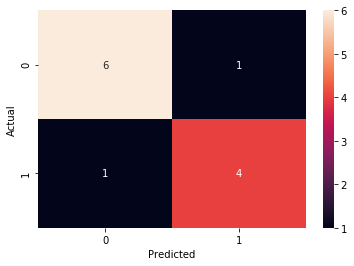

In [48]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


In [49]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8333333333333334


In [50]:
#prediction for the 5 new candidates:
new_candidates = {'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  'admitted':[1,0,1,0,1]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['gmat', 'gpa','work_experience'])
y_pred=logistic_regression.predict(df2)

print (df2)
print (y_pred)


   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
[0 1 1 0 1]


In [51]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [12, 5]